<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/mappingclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive')

In [3]:
output_directories='out_shp'
if not os.path.exists(output_directories):
  os.makedirs(output_directories)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# reading cluster results
cluster_df=pd.read_csv('/content/drive/MyDrive/output_tab_cluster/cluster_df.csv')
cluster_df.head()

,Unnamed: 0,clusters,zones
0,0,Cluster 1,Cheongju14
1,1,Cluster 1,Cheorwon54
2,2,Cluster 1,Chuncheon55
3,3,Cluster 1,Daedeok49
4,4,Cluster 1,Dangjin30


In [6]:
# reading shapefile 
!pip install geopandas --quiet

     |████████████████████████████████| 1.0 MB 2.8 MB/s 
     |████████████████████████████████| 15.4 MB 57 kB/s 
     |████████████████████████████████| 6.3 MB 44.2 MB/s 


In [7]:
import geopandas as gpd

In [8]:
zone_gdf=gpd.read_file('input_shp/inputzones.shp')
zone_gdf.head()

,FID_1,area,NAME_1,NL_NAME_1,NAME_2,NL_NAME_2,NAMEID,TREND,OBS,PRED,MAPE,MSE,MAE,geometry
0,76,49.7705,Busan,????? | ?????,Buk,??| ??,Buk0,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((129.07016 35.21380, 129.06653 35.203..."
1,65,28.1677,Busan,????? | ?????,Busanjin,????| ????,Busanjin1,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((129.05264 35.17857, 129.05736 35.172..."
2,73,21.1378,Busan,????? | ?????,Dongnae,???| ???,Dongnae2,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((129.12959 35.21408, 129.12703 35.207..."
3,50,20.9473,Busan,????? | ?????,Gangseo,???| ???,Gangseo3,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((128.83041 35.06708, 128.83041 35.066..."
4,68,105.6810,Busan,????? | ?????,Gangseo,???| ???,Gangseo4,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((128.99573 35.17683, 128.98854 35.173..."


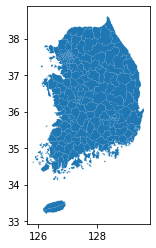

In [9]:
# Plot check
zone_gdf.plot()

In [10]:
# Create new variable cluster and register cluster values
zone_gdf['cluster']=''


In [11]:
for i in range(zone_gdf.shape[0]):
  zone_gdf['cluster'][i]=int((cluster_df.loc[cluster_df['zones'] == zone_gdf['NAMEID'][i]]).iloc[:,1].values[0][7:])
  # print(zone_gdf['NAMEID'][i])
zone_gdf.to_file(output_directories+'/'+'cluster.shp')
zone_gdf.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FID_1,area,NAME_1,NL_NAME_1,NAME_2,NL_NAME_2,NAMEID,TREND,OBS,PRED,MAPE,MSE,MAE,geometry,cluster
0,76,49.7705,Busan,????? | ?????,Buk,??| ??,Buk0,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((129.07016 35.21380, 129.06653 35.203...",12
1,65,28.1677,Busan,????? | ?????,Busanjin,????| ????,Busanjin1,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((129.05264 35.17857, 129.05736 35.172...",10
2,73,21.1378,Busan,????? | ?????,Dongnae,???| ???,Dongnae2,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((129.12959 35.21408, 129.12703 35.207...",9
3,50,20.9473,Busan,????? | ?????,Gangseo,???| ???,Gangseo3,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((128.83041 35.06708, 128.83041 35.066...",4
4,68,105.6810,Busan,????? | ?????,Gangseo,???| ???,Gangseo4,no trend,0.0,0.0,0.0,0.0,0.0,"POLYGON ((128.99573 35.17683, 128.98854 35.173...",3


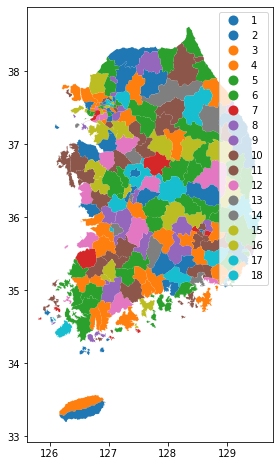

In [29]:
# Plot population estimates with an accurate legend

fig, ax = plt.subplots(figsize=(6,8))
zone_gdf.plot(column='cluster', ax=ax, legend=True,legend_kwds={'loc': 'best'})


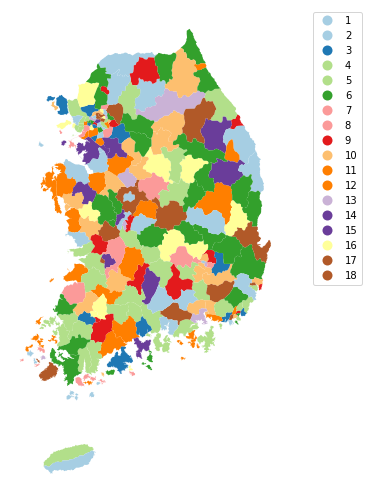

In [31]:
# cho no nam qua ben
# buildings = gpd.read_file("buildings.shp")

fig, ax = plt.subplots(1,1,figsize=(9,9))
zone_gdf.to_crs(epsg=3857).plot(column='cluster', ax=ax, cmap="Paired", legend=True, legend_kwds={'bbox_to_anchor': (1.3, 1)})
# ctx.add_basemap(ax, url=ctx.providers.Esri.WorldTopoMap)
ax.axis('off')
plt.show()